In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
!pip install scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Trees
from sklearn.ensemble import RandomForestClassifier  # Random Forest

# Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Miscellaneous
import warnings
warnings.filterwarnings('ignore')
import time


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/liver_patient_dataset.csv', encoding='latin1')
print(df.head())


   Age of the patient Gender of the patient  Total Bilirubin  \
0                65.0                Female              0.7   
1                62.0                  Male             10.9   
2                62.0                  Male              7.3   
3                58.0                  Male              1.0   
4                72.0                  Male              3.9   

   Direct Bilirubin   Alkphos Alkaline Phosphotase  \
0               0.1                          187.0   
1               5.5                          699.0   
2               4.1                          490.0   
3               0.4                          182.0   
4               2.0                          195.0   

    Sgpt Alamine Aminotransferase  Sgot Aspartate Aminotransferase  \
0                            16.0                             18.0   
1                            64.0                            100.0   
2                            60.0                             68.0   
3         

Artificial Neural Network (ANN) Test

In [ ]:
df = df.dropna()

In [ ]:
label_encoders = {}
for column in df.select_dtypes(include=[object]).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target variable

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
544/544 [==============================] - 5s 7ms/step - loss: -24999.0527 - accuracy: 0.7117 - val_loss: -141475.6406 - val_accuracy: 0.7158
Epoch 2/50
544/544 [==============================] - 6s 11ms/step - loss: -940959.0000 - accuracy: 0.7173 - val_loss: -2481004.5000 - val_accuracy: 0.7158
Epoch 3/50
544/544 [==============================] - 5s 9ms/step - loss: -6283299.5000 - accuracy: 0.7173 - val_loss: -11659290.0000 - val_accuracy: 0.7158
Epoch 4/50
544/544 [==============================] - 3s 6ms/step - loss: -20703758.0000 - accuracy: 0.7173 - val_loss: -32382230.0000 - val_accuracy: 0.7158
Epoch 5/50
544/544 [==============================] - 6s 10ms/step - loss: -48749524.0000 - accuracy: 0.7173 - val_loss: -69141592.0000 - val_accuracy: 0.7158
Epoch 6/50
544/544 [==============================] - 4s 7ms/step - loss: -95720416.0000 - accuracy: 0.7173 - val_loss: -127363152.0000 - val_accuracy: 0.7158
Epoch 7/50
544/544 [==============================] - 3s 6

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 71.80%


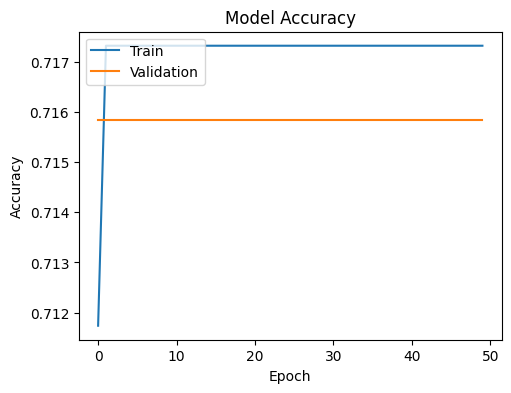

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

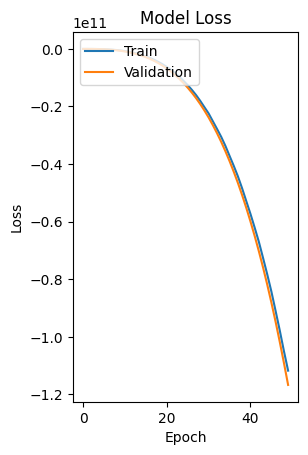

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Logistic Regression (LR) Test

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7280927835051546
Confusion Matrix:
[[3668  232]
 [1245  287]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83      3900
           2       0.55      0.19      0.28      1532

    accuracy                           0.73      5432
   macro avg       0.65      0.56      0.56      5432
weighted avg       0.69      0.73      0.68      5432



Decision Trees Test

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

In [ ]:

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [ ]:
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8888070692194403


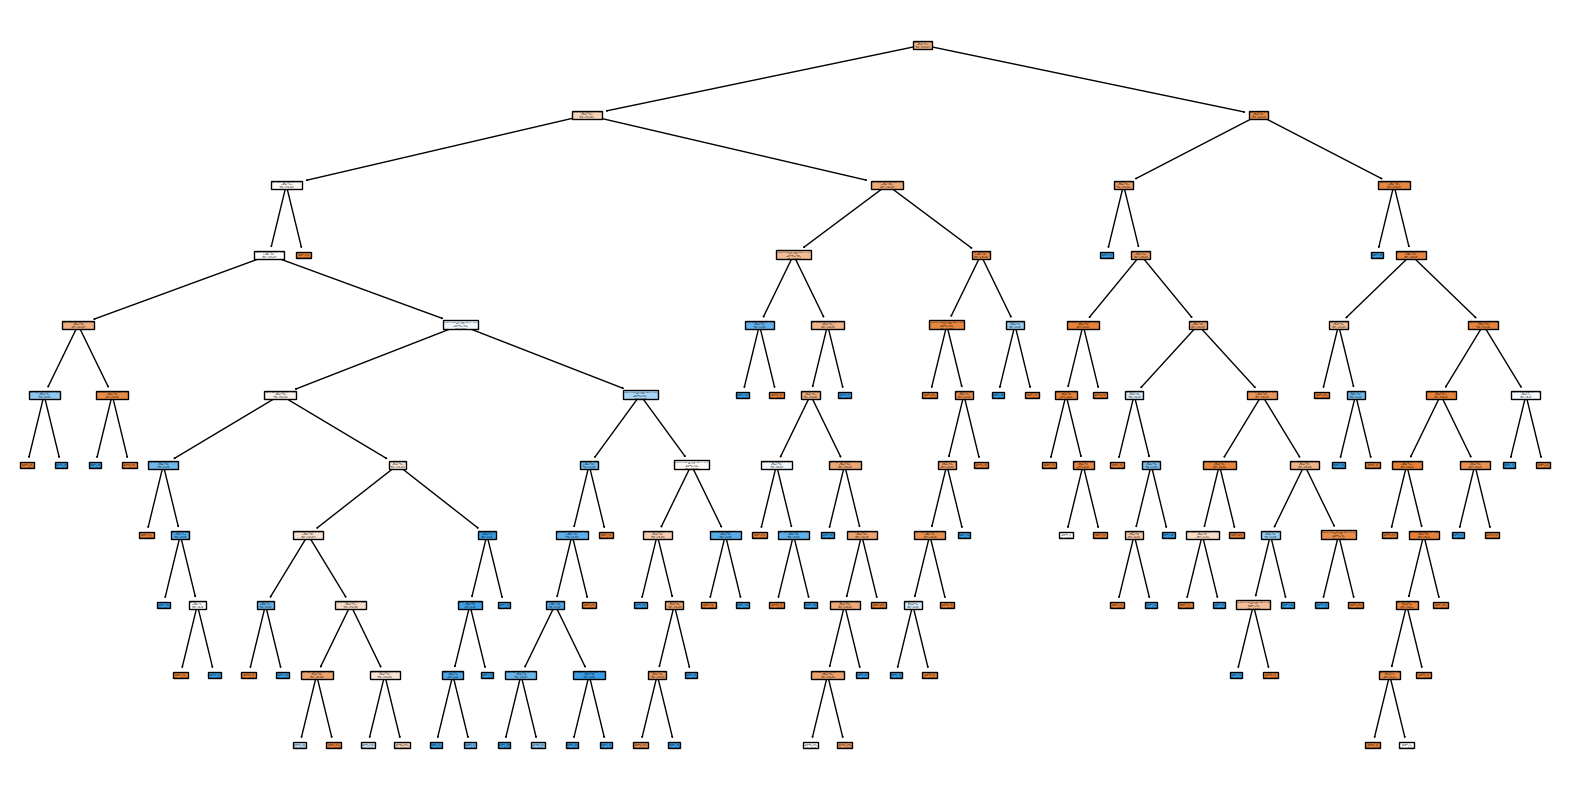

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.show()

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8888070692194403
Confusion Matrix:
[[3668  232]
 [1245  287]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83      3900
           2       0.55      0.19      0.28      1532

    accuracy                           0.73      5432
   macro avg       0.65      0.56      0.56      5432
weighted avg       0.69      0.73      0.68      5432



Random Forest

In [ ]:
X= df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [ ]:
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.84850079 0.84955287 0.84560757 0.8311415  0.82062073]
Mean Cross-Validation Score: 0.8390846922672278


In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [ ]:
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")

Random Forest Accuracy: 0.820446735395189
Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.96      0.88      5831
           2       0.82      0.47      0.60      2317

    accuracy                           0.82      8148
   macro avg       0.82      0.72      0.74      8148
weighted avg       0.82      0.82      0.80      8148

Confusion Matrix:
[[5585  246]
 [1217 1100]]


PCA and ANN combination

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
1956/1956 [==============================] - 7s 3ms/step - loss: -1184.5402 - accuracy: 0.7157 - val_loss: -4769.3208 - val_accuracy: 0.7055
Epoch 2/50
1956/1956 [==============================] - 6s 3ms/step - loss: -14436.8701 - accuracy: 0.7183 - val_loss: -29152.2305 - val_accuracy: 0.7055
Epoch 3/50
1956/1956 [==============================] - 5s 3ms/step - loss: -50342.8672 - accuracy: 0.7183 - val_loss: -80488.0469 - val_accuracy: 0.7055
Epoch 4/50
1956/1956 [==============================] - 4s 2ms/step - loss: -114239.6797 - accuracy: 0.7183 - val_loss: -162989.8125 - val_accuracy: 0.7055
Epoch 5/50
1956/1956 [==============================] - 6s 3ms/step - loss: -211033.5625 - accuracy: 0.7183 - val_loss: -282830.0312 - val_accuracy: 0.7055
Epoch 6/50
1956/1956 [==============================] - 5s 3ms/step - loss: -345407.9688 - accuracy: 0.7183 - val_loss: -444786.2188 - val_accuracy: 0.7055
Epoch 7/50
1956/1956 [==============================] - 4s 2ms/step - lo

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

170/170 [==============================] - 1s 2ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7179675994108984
Confusion Matrix:
[[3900    0]
 [1532    0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.72      1.00      0.84      3900
           2       0.00      0.00      0.00      1532

    accuracy                           0.72      5432
   macro avg       0.36      0.50      0.42      5432
weighted avg       0.52      0.72      0.60      5432



PCA and Logistic Regression Combination

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7288291605301914
Confusion Matrix:
[[3674  226]
 [1247  285]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83      3900
           2       0.56      0.19      0.28      1532

    accuracy                           0.73      5432
   macro avg       0.65      0.56      0.56      5432
weighted avg       0.69      0.73      0.68      5432



PCA and Decision Trees Combination

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9265463917525774
Confusion Matrix:
[[3758  142]
 [ 257 1275]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.96      0.95      3900
           2       0.90      0.83      0.86      1532

    accuracy                           0.93      5432
   macro avg       0.92      0.90      0.91      5432
weighted avg       0.93      0.93      0.93      5432



PCA and Random Forest combination

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
rf_clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [ ]:
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

Cross-Validation Scores: [0.78624022 0.77744534 0.7739931  0.79010357 0.7716916 ]
Mean Cross-Validation Score: 0.7798947645467943


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.93
Confusion Matrix:
[[3758  142]
 [ 257 1275]]
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.96      0.95      3900
           2       0.90      0.83      0.86      1532

    accuracy                           0.93      5432
   macro avg       0.92      0.90      0.91      5432
weighted avg       0.93      0.93      0.93      5432



LDA and ANN combination

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
1956/1956 [==============================] - 8s 3ms/step - loss: -876.2732 - accuracy: 0.7183 - val_loss: -3491.7754 - val_accuracy: 0.7055
Epoch 2/50
1956/1956 [==============================] - 4s 2ms/step - loss: -10382.9600 - accuracy: 0.7183 - val_loss: -21045.3320 - val_accuracy: 0.7055
Epoch 3/50
1956/1956 [==============================] - 4s 2ms/step - loss: -35612.1133 - accuracy: 0.7183 - val_loss: -56888.0820 - val_accuracy: 0.7055
Epoch 4/50
1956/1956 [==============================] - 6s 3ms/step - loss: -79962.4453 - accuracy: 0.7183 - val_loss: -114500.8594 - val_accuracy: 0.7055
Epoch 5/50
1956/1956 [==============================] - 4s 2ms/step - loss: -146400.0156 - accuracy: 0.7183 - val_loss: -196758.4531 - val_accuracy: 0.7055
Epoch 6/50
1956/1956 [==============================] - 4s 2ms/step - loss: -239001.4531 - accuracy: 0.7183 - val_loss: -308845.0625 - val_accuracy: 0.7055
Epoch 7/50
1956/1956 [==============================] - 6s 3ms/step - loss

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

170/170 [==============================] - 0s 1ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7179675994108984
Confusion Matrix:
[[3900    0]
 [1532    0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.72      1.00      0.84      3900
           2       0.00      0.00      0.00      1532

    accuracy                           0.72      5432
   macro avg       0.36      0.50      0.42      5432
weighted avg       0.52      0.72      0.60      5432



LDA and Logistic Regression

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.7115243004418262
Confusion Matrix:
[[3635  265]
 [1302  230]]
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.93      0.82      3900
           2       0.46      0.15      0.23      1532

    accuracy                           0.71      5432
   macro avg       0.60      0.54      0.52      5432
weighted avg       0.66      0.71      0.65      5432



LDA and Decision Trees Combination

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8481222385861561
Confusion Matrix:
[[3471  429]
 [ 396 1136]]
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.89      0.89      3900
           2       0.73      0.74      0.73      1532

    accuracy                           0.85      5432
   macro avg       0.81      0.82      0.81      5432
weighted avg       0.85      0.85      0.85      5432



LDA and Random Forest combination

In [ ]:
df = df.dropna()
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
cv_scores = cross_val_score(model, X_lda, y, cv=5)


In [ ]:
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')

Cross-Validation Accuracy: 0.76 ± 0.00


In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [ ]:
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.76
Confusion Matrix:
[[3672  228]
 [1075  457]]
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.94      0.85      3900
           2       0.67      0.30      0.41      1532

    accuracy                           0.76      5432
   macro avg       0.72      0.62      0.63      5432
weighted avg       0.74      0.76      0.73      5432



Assessment of Algorithms

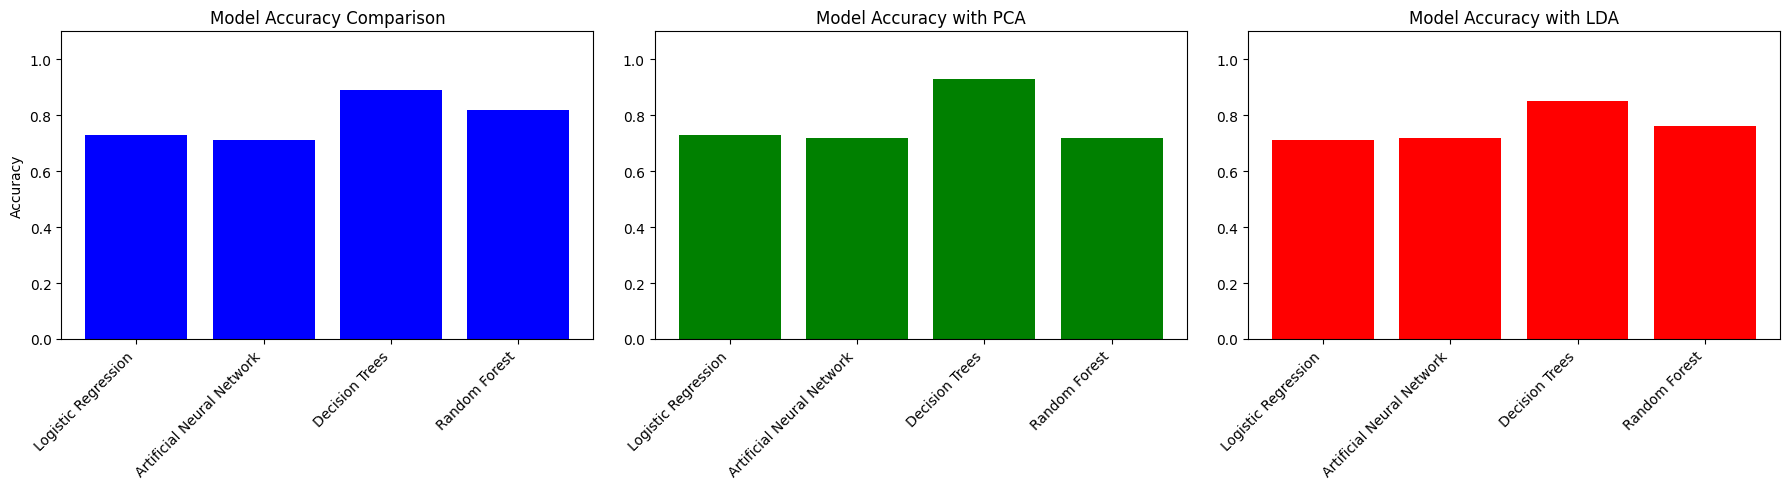

In [ ]:

accuracy_lr = 0.73
accuracy_ann = 0.71
accuracy_dt = 0.89
accuracy_rf = 0.82

accuracy_lr_pca = 0.73
accuracy_ann_pca = 0.72
accuracy_dt_pca = 0.93
accuracy_rf_pca = 0.72

accuracy_lr_lda = 0.71
accuracy_ann_lda = 0.72
accuracy_dt_lda = 0.85
accuracy_rf_lda = 0.76


# Model names
models = ['Logistic Regression', 'Artificial Neural Network', 'Decision Trees', 'Random Forest']

# Accuracies without feature reduction
accuracies = [accuracy_lr, accuracy_ann, accuracy_dt, accuracy_rf]

# Accuracies with PCA
accuracies_pca = [accuracy_lr_pca, accuracy_ann_pca, accuracy_dt_pca, accuracy_rf_pca]

# Accuracies with LDA
accuracies_lda = [accuracy_lr_lda, accuracy_ann_lda, accuracy_dt_lda, accuracy_rf_lda]

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Comparing accuracies without feature reduction
axs[0].bar(models, accuracies, color='blue')
axs[0].set_title('Model Accuracy Comparison')
axs[0].set_ylabel('Accuracy')
axs[0].set_ylim([0, 1.1])
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_xticklabels(models, rotation=45, ha='right')

# Plot 2: Comparing accuracies with PCA
axs[1].bar(models, accuracies_pca, color='green')
axs[1].set_title('Model Accuracy with PCA')
axs[1].set_ylim([0, 1.1])
axs[1].tick_params(axis='x', rotation=45)
axs[1].set_xticklabels(models, rotation=45, ha='right')

# Plot 3: Comparing accuracies with LDA
axs[2].bar(models, accuracies_lda, color='red')
axs[2].set_title('Model Accuracy with LDA')
axs[2].set_ylim([0, 1.1])
axs[2].tick_params(axis='x', rotation=45)
axs[2].set_xticklabels(models, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

Runtime Measurement

In [ ]:
df = df.dropna()
X = df.drop(columns=['Result'])
y = df['Result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
start_time = time.time()
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(X_train, y_train)
lr_time = time.time() - start_time

print(f"Logistic Regression Runtime: {lr_time} seconds")

Logistic Regression Runtime: 0.2351088523864746 seconds


In [ ]:
# Applying PCA
pca = PCA(n_components=0.95)  # Adjust the n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Measure the runtime for Logistic Regression with PCA
start_time = time.time()
lr_clf_pca = LogisticRegression(random_state=42)
lr_clf_pca.fit(X_train_pca, y_train)
lr_time_pca = time.time() - start_time


print(f"Logistic Regression with PCA Runtime: {lr_time_pca} seconds")


Logistic Regression with PCA Runtime: 0.09312009811401367 seconds


In [ ]:
# Applying LDA
lda = LDA(n_components=1)  # Adjust the n_components as needed
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Measure the runtime for Logistic Regression with LDA
start_time = time.time()
lr_clf_lda = LogisticRegression(random_state=42)
lr_clf_lda.fit(X_train_lda, y_train)
lr_time_lda = time.time() - start_time



print(f"Logistic Regression with LDA Runtime: {lr_time_lda} seconds")

Logistic Regression with LDA Runtime: 0.057523250579833984 seconds


In [ ]:
start_time = time.time()
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_time = time.time() - start_time


print(f"Decision Tree Runtime: {dt_time} seconds")

Decision Tree Runtime: 0.21959519386291504 seconds


In [ ]:
# Applying PCA
pca = PCA(n_components=0.95)  # Adjust the n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Measure the runtime for Decision Tree with PCA
start_time = time.time()
dt_clf_pca = DecisionTreeClassifier(random_state=42)
dt_clf_pca.fit(X_train_pca, y_train)
dt_time_pca = time.time() - start_time


print(f"Decision Tree with PCA Runtime: {dt_time_pca} seconds")

Decision Tree with PCA Runtime: 0.3037376403808594 seconds


In [ ]:
# Applying LDA
lda = LDA(n_components=1)  # Adjust the n_components as needed
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Measure the runtime for Decision Tree with LDA
start_time = time.time()
dt_clf_lda = DecisionTreeClassifier(random_state=42)
dt_clf_lda.fit(X_train_lda, y_train)
dt_time_lda = time.time() - start_time



print(f"Decision Tree with LDA Runtime: {dt_time_lda} seconds")

Decision Tree with LDA Runtime: 0.07213234901428223 seconds


In [ ]:
start_time = time.time()
rf_clf = RandomForestClassifier(random_state=42)
start_time = time.time()
rf_clf.fit(X_train, y_train)
rf_time = time.time() - start_time
print(f"Random Forest Training Runtime: {rf_time} seconds")

Random Forest Training Runtime: 2.5507051944732666 seconds


In [ ]:
# Applying PCA
pca = PCA(n_components=0.95)  # Adjust the n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Measure the runtime for Random Forest with PCA
start_time = time.time()
rf_clf_pca = RandomForestClassifier(random_state=42)
rf_clf_pca.fit(X_train_pca, y_train)
rf_time_pca = time.time() - start_time


print(f"Random Forest with PCA Runtime: {rf_time_pca} seconds")

Random Forest with PCA Runtime: 7.470663070678711 seconds


In [ ]:
# Applying LDA
lda = LDA(n_components=1)  # Adjust the n_components as needed
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Measure the runtime for Random Forest with LDA
start_time = time.time()
rf_clf_lda = RandomForestClassifier(random_state=42)
rf_clf_lda.fit(X_train_lda, y_train)
rf_time_lda = time.time() - start_time


print(f"Random Forest with LDA Runtime: {rf_time_lda} seconds")

Random Forest with LDA Runtime: 3.53635835647583 seconds


In [ ]:
start_time = time.time()
ann_model = Sequential()
ann_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(64, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)
ann_time = time.time() - start_time

print(f"ANN Runtime: {ann_time} seconds")

ANN Runtime: 264.49969816207886 seconds


In [ ]:
# Applying PCA
pca = PCA(n_components=0.95)  # Adjust the n_components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define and measure the runtime for ANN with PCA
start_time = time.time()
ann_model_pca = Sequential()
ann_model_pca.add(Dense(128, input_dim=X_train_pca.shape[1], activation='relu'))
ann_model_pca.add(Dropout(0.5))
ann_model_pca.add(Dense(64, activation='relu'))
ann_model_pca.add(Dense(1, activation='sigmoid'))
ann_model_pca.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model_pca.fit(X_train_pca, y_train, epochs=50, batch_size=10, verbose=0)
ann_time_pca = time.time() - start_time

print(f"ANN with PCA Runtime: {ann_time_pca} seconds")


170/170 [==============================] - 0s 2ms/step
ANN with PCA Runtime: 234.05810022354126 seconds


In [ ]:
# Applying LDA
lda = LDA(n_components=1)  # Adjust the n_components as needed
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Define and measure the runtime for ANN with LDA
start_time = time.time()
ann_model_lda = Sequential()
ann_model_lda.add(Dense(128, input_dim=X_train_lda.shape[1], activation='relu'))
ann_model_lda.add(Dropout(0.5))
ann_model_lda.add(Dense(64, activation='relu'))
ann_model_lda.add(Dense(1, activation='sigmoid'))
ann_model_lda.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model_lda.fit(X_train_lda, y_train, epochs=50, batch_size=10, verbose=0)
ann_time_lda = time.time() - start_time


print(f"ANN with LDA Runtime: {ann_time_lda} seconds")



170/170 [==============================] - 1s 2ms/step
ANN with LDA Runtime: 262.97805881500244 seconds
